In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json


In [19]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [4]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [5]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [6]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 34s 17ms/step - loss: 0.2342 - accuracy: 0.9299 - val_loss: 0.0952 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0897 - accuracy: 0.9730 - val_loss: 0.0549 - val_accuracy: 0.9854
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0434 - val_accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0234 - val_accuracy: 0.9928


In [8]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 11ms/step - loss: 0.0518 - accuracy: 0.9838


[0.051839958876371384, 0.9837999939918518]

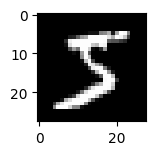

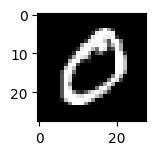

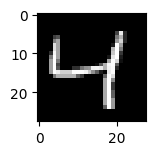

In [9]:
for i in range(3):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [21]:
import os
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

['keras_metadata.pb', 'fingerprint.pb', 'variables', 'assets', 'saved_model.pb']


In [13]:
lenet_5_model.save("my.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [15]:
json_model = lenet_5_model.to_json()

In [16]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [17]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [18]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[ 0.36603782,  0.03872602,  0.08944488,  0.04840619,
          -0.05264271, -0.35263923]],

        [[ 0.38163552, -0.48243693,  0.19180249,  0.28024992,
           0.04685313, -0.03009077]],

        [[ 0.10235526, -0.21885628, -0.17486706,  0.40003538,
           0.11851145, -0.08626744]],

        [[ 0.14283888, -0.13559237, -0.1908313 ,  0.06587894,
           0.2997493 , -0.35779378]],

        [[ 0.33819553,  0.02804587, -0.06444795,  0.35933396,
          -0.01716539, -0.31925383]]],


       [[[ 0.28358006, -0.3663302 ,  0.03452369,  0.0224407 ,
          -0.0585041 , -0.1040931 ]],

        [[ 0.07283171, -0.5952971 ,  0.05672828,  0.24971724,
           0.07202347, -0.09035774]],

        [[ 0.20268975, -0.41778618, -0.06583329,  0.30556342,
           0.09602951,  0.01161923]],

        [[ 0.21312821, -0.06151321, -0.55790454, -0.06449449,
           0.3326493 , -0.01702857]],

        [[ 0.00091669,  0.17763244, -0.5232404 , -0.00992475,
           0.44980028, -0.2